In [1]:
# Purpose of the code:
    # Find the correlation between change of features values and change in MSFC scores in visits 2 & 3
    # Find the most stable/variant features through out the study (based on standard deviation)

In [2]:
# necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
from scipy import stats
%matplotlib inline

In [3]:
# switch to a proper directory to access the data
pwd

'/camhpc/home/nhassanp/jupyter-notebook-dir'

In [4]:
cd /camdatalake/bronze/verily_ms/device/

/camdatalake/bronze/verily_ms/device


In [5]:
pwd

'/camdatalake/bronze/verily_ms/device'

In [6]:
# check the content of the directory
ls

FeaturesDay.csv.gz                     tree_10.dot  tree_26.dot  tree_41.dot
FeaturesStudy.csv.gz                   tree_11.dot  tree_27.dot  tree_42.dot
FeatureStudy_at_home_related           tree_12.dot  tree_28.dot  tree_43.dot
FeatureStudy_clinical_1_related        tree_13.dot  tree_29.dot  tree_44.dot
FeatureStudy_clinical_2_related        tree_14.dot  tree_2.dot   tree_45.dot
FeatureStudy_clinical_3_related        tree_15.dot  tree_30.dot  tree_46.dot
FeatureStudy_clinical_related          tree_16.dot  tree_31.dot  tree_47.dot
FeatureStudy_demographics_related      tree_17.dot  tree_32.dot  tree_48.dot
FeatureStudy_free_living_related       tree_18.dot  tree_33.dot  tree_49.dot
FeatureStudy_model_related             tree_19.dot  tree_34.dot  tree_4.dot
FeatureStudy_MSFC_composite_related    tree_1.dot   tree_35.dot  tree_50.dot
FeatureStudy_MSFC_related              tree_20.dot  tree_36.dot  tree_5.dot
FeatureStudy_patient_info_related      tree_21.dot  tree_37.dot  tree_6.dot
GM

In [7]:
# download and read the data

# FeatureDay: Average value of the features for each day of study. Days are listed as 
# DayOfStudy

# FeatureStudy: Features for the entire study period.For the at home features, 
# the reported value is the median of the observed day level values.

import gzip, csv
with gzip.open("FeaturesDay.csv.gz", "rt", newline="") as file:
    FeatureDay = pd.read_csv(file, header = 0)

with gzip.open("FeaturesStudy.csv.gz", "rt", newline="") as file:
    FeatureStudy = pd.read_csv(file, header = 0)

In [8]:
# explore the dataset
FeatureDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Columns: 217 entries, user_email to demographic_model_error_3
dtypes: float64(212), int64(3), object(2)
memory usage: 2.5+ MB


In [9]:
FeatureDay.describe()

/opt/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,msfc_walk_composite_1,msfc_9hpt_composite_1,msfc_sdmt_composite_1,msfc_snellen_composite_1,msfc_composite_1,msfc_walk_composite_residual_1,msfc_9hpt_composite_residual_1,msfc_sdmt_composite_residual_1,msfc_snellen_composite_residual_1,msfc_walk_composite_2,...,hourly_temp_median_at_home,hourly_temp_std_at_home,hourly_temp_range_at_home,hourly_amb_temp_median_at_home,hourly_amb_temp_std_at_home,hourly_amb_temp_range_at_home,prv_sdnn,demographic_model_error_1,demographic_model_error_2,demographic_model_error_3
count,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1530.000000,...,1285.000000,1285.000000,1.285000e+03,1285.000000,1285.000000,1285.000000,1044.000000,1532.000000,1530.000000,1304.000000
mean,-0.019921,0.090237,0.144536,0.039580,0.063608,-0.080672,0.030814,0.128497,-0.036285,0.039871,...,29.650973,0.726677,1.766848e+00,25.396385,3.906939,9.583735,41.326326,0.071111,-0.000918,0.025754
std,1.003682,0.953135,0.862097,1.015171,0.763705,0.820543,0.894932,0.785066,1.075377,0.776117,...,2.929483,0.786577,1.732030e+00,2.653647,1.401338,3.322437,11.870807,0.724094,0.740245,0.799465
min,-3.221528,-1.886624,-2.159982,-2.556372,-1.373281,-3.038226,-1.545838,-1.801496,-2.351975,-2.248677,...,16.700000,0.000000,-3.552714e-15,16.185000,0.000000,0.000000,11.727158,-1.577726,-1.461933,-2.505707
25%,-0.256647,-0.645806,-0.411009,-0.416552,-0.398860,-0.201410,-0.680438,-0.321350,-0.802429,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.426405,NaN,NaN
50%,0.299268,0.104155,0.135545,0.296722,0.345561,0.038386,0.180416,0.138712,-0.257036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277935,NaN,NaN
75%,0.669878,0.940655,0.900721,1.295305,0.642663,0.301486,0.790244,0.656998,0.807599,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741979,NaN,NaN
max,0.924672,1.897517,1.939174,1.295305,1.137124,1.463065,1.543403,2.247295,1.817092,0.924672,...,33.600000,6.860394,1.470500e+01,32.740000,7.682660,18.409500,114.271105,1.117692,0.987118,1.151321


In [10]:
FeatureDay.head()

,user_email,gls_subject_code,msfc_walk_composite_1,msfc_9hpt_composite_1,msfc_sdmt_composite_1,msfc_snellen_composite_1,msfc_composite_1,msfc_walk_composite_residual_1,msfc_9hpt_composite_residual_1,msfc_sdmt_composite_residual_1,...,hourly_temp_median_at_home,hourly_temp_std_at_home,hourly_temp_range_at_home,hourly_amb_temp_median_at_home,hourly_amb_temp_std_at_home,hourly_amb_temp_range_at_home,prv_sdnn,demographic_model_error_1,demographic_model_error_2,demographic_model_error_3
0,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,32.70,0.760989,1.905,30.7575,4.330252,11.7550,26.824533,-0.924262,-1.03338,-1.525646
1,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,32.85,0.532629,1.350,29.5875,6.815948,15.8120,24.795007,-0.924262,-1.03338,-1.525646
2,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,31.60,0.717705,1.800,30.2200,3.545528,7.3300,28.387662,-0.924262,-1.03338,-1.525646
3,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,30.75,1.689474,5.550,27.3600,4.984148,13.5820,31.598062,-0.924262,-1.03338,-1.525646
4,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,30.65,0.830880,2.205,30.6825,4.699070,13.8555,23.523694,-0.924262,-1.03338,-1.525646


In [11]:
# extract names of features in the dataset
list(FeatureDay.columns)

['user_email',
 'gls_subject_code',
 'msfc_walk_composite_1',
 'msfc_9hpt_composite_1',
 'msfc_sdmt_composite_1',
 'msfc_snellen_composite_1',
 'msfc_composite_1',
 'msfc_walk_composite_residual_1',
 'msfc_9hpt_composite_residual_1',
 'msfc_sdmt_composite_residual_1',
 'msfc_snellen_composite_residual_1',
 'msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_residual_2',
 'msfc_9hpt_composite_residual_2',
 'msfc_sdmt_composite_residual_2',
 'msfc_snellen_composite_residual_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3',
 'msfc_walk_composite_residual_3',
 'msfc_9hpt_composite_residual_3',
 'msfc_sdmt_composite_residual_3',
 'msfc_snellen_composite_residual_3',
 'sex',
 'height_inch',
 'weight_lbs',
 'bmi',
 'age_years',
 'dayofstudy',
 'movement_rate',
 'duration_movement_count',
 'stance',
 'swing',
 'turn_a

In [12]:
# found list of unique IDs for patients
patient_IDs = list(FeatureDay['gls_subject_code'].unique())
patient_IDs

['H800001',
 'H800002',
 'H800003',
 'H800004',
 'H800006',
 'H800007',
 'H800008',
 'H800009',
 'H800010',
 'H800011',
 'H800013',
 'H800014',
 'H800016',
 'H800017',
 'H800018',
 'H800019',
 'H800020',
 'H800021',
 'H800022',
 'H800023',
 'H800024',
 'H800025',
 'H800005',
 'H800012',
 'H800015']

In [13]:
# normalizing feaure values in FeaturesDay for each column
df = FeatureDay.drop(['user_email','gls_subject_code'],axis=1)
FeatureDay_norm = (df - df.mean()) / (df.max() - df.min())
FeatureDay_norm = pd.concat([FeatureDay[['user_email','gls_subject_code']],FeatureDay_norm],axis=1)
FeatureDay_norm.head()

,user_email,gls_subject_code,msfc_walk_composite_1,msfc_9hpt_composite_1,msfc_sdmt_composite_1,msfc_snellen_composite_1,msfc_composite_1,msfc_walk_composite_residual_1,msfc_9hpt_composite_residual_1,msfc_sdmt_composite_residual_1,...,hourly_temp_median_at_home,hourly_temp_std_at_home,hourly_temp_range_at_home,hourly_amb_temp_median_at_home,hourly_amb_temp_std_at_home,hourly_amb_temp_range_at_home,prv_sdnn,demographic_model_error_1,demographic_model_error_2,demographic_model_error_3
0,gmssm001@glsstudykit.com,H800001,-0.040335,-0.522407,-0.34886,-0.396202,-0.507903,0.247965,-0.510369,0.002523,...,0.180416,0.005001,0.009395,0.323837,0.055100,0.117943,-0.141420,-0.369283,-0.421576,-0.424224
1,gmssm001@glsstudykit.com,H800001,-0.040335,-0.522407,-0.34886,-0.396202,-0.507903,0.247965,-0.510369,0.002523,...,0.189292,-0.028285,-0.028347,0.253163,0.378646,0.338318,-0.161212,-0.369283,-0.421576,-0.424224
2,gmssm001@glsstudykit.com,H800001,-0.040335,-0.522407,-0.34886,-0.396202,-0.507903,0.247965,-0.510369,0.002523,...,0.115327,-0.001308,0.002254,0.291369,-0.047042,-0.122422,-0.126177,-0.369283,-0.421576,-0.424224
3,gmssm001@glsstudykit.com,H800001,-0.040335,-0.522407,-0.34886,-0.396202,-0.507903,0.247965,-0.510369,0.002523,...,0.065031,0.140341,0.257270,0.118612,0.140213,0.217185,-0.094869,-0.369283,-0.421576,-0.424224
4,gmssm001@glsstudykit.com,H800001,-0.040335,-0.522407,-0.34886,-0.396202,-0.507903,0.247965,-0.510369,0.002523,...,0.059114,0.015189,0.029796,0.319306,0.103106,0.232041,-0.173610,-0.369283,-0.421576,-0.424224


In [14]:
# normalizing data using a built in function
# I cannot use this because my data contains null values and this function does not handle null values

# from sklearn import preprocessing
# df = FeatureDay.drop(['user_email','gls_subject_code'],axis=1)
# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pandas.DataFrame(x_scaled)

In [15]:
# 10 free-living features with high correlation to MSFC

free_living_features_highly_correlated = ['idle_minutes',
 'turn_vel_std_ankle',
 'swing',
 'stance',
 'duration_movement_count',
 'turn_vel_max_ankle',
 'turn_duration_ankle',
 'duration_rem_count',
 'rem_percent',
 'movement_rate']

In [16]:
# 19 highly correlated at home features (structured activity) to MSFC

at_home_features_highly_correlated = ['mean_pvt_delay_7_at_home',
 'mobility_stance_at_home',
 'mean_pvt_delay_at_home',
 'pq_nondominant_rhythm_at_home',
 'pq_nondominant_median_at_home',
 'pq_dominant_rhythm_at_home',
 'turn_vel_max_at_home',
 'mobility_swing_at_home',
 'zx_dominant_num_correct_at_home',
 'turn_vel_std_at_home',
 'turn_duration_ankle_at_home',
 'turn_vel_max_ankle_at_home',
 'mean_pvt_delay_5_at_home',
 'zx_nondominant_median_at_home',
 'zx_nondominant_num_correct_at_home',
 'mean_pvt_delay_3_at_home',
 'turn_vel_std_ankle_at_home',
 'mobility_activity_at_home_time',
 'mean_pvt_delay_1_at_home']

In [17]:
# features related to MSFC scores (all components including composite scores)
FeaturesDay_columns_MSFC_col_names = ['msfc_walk_composite_1',
 'msfc_9hpt_composite_1',
 'msfc_sdmt_composite_1',
 'msfc_snellen_composite_1',
 'msfc_composite_1',
 'msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3']

In [18]:
# features related to MSFC composite scores
FeaturesDay_columns_MSFC_composite_col_names = ['msfc_composite_1', 'msfc_composite_2', 'msfc_composite_3']

In [19]:
# breaking down FeatureDay dataframe
FeatureDay_free_living = FeatureDay[free_living_features_highly_correlated]
FeatureDay_at_home = FeatureDay[at_home_features_highly_correlated]
FeaFeatureDay_MSFC_score_all = FeatureDay[FeaturesDay_columns_MSFC_col_names]
FeaFeatureDay_MSFC_score_composite = FeatureDay[FeaturesDay_columns_MSFC_composite_col_names]

In [20]:
# create a data frame with patient IDs, all components of MSFC score for visits 2 and 3
# the scores are already normalized (FeatureDay_norm)
patient_ID = []
msfc_composite_2 = []
msfc_composite_3 = []
msfc_walk_composite_2 = []
msfc_walk_composite_3 = []
msfc_9hpt_composite_2 = []
msfc_9hpt_composite_3 = []
msfc_sdmt_composite_2 = [] 
msfc_sdmt_composite_3 = []
msfc_snellen_composite_2 = []
msfc_snellen_composite_3 = []

for idx in range(len(patient_IDs)):
    ID = patient_IDs[idx]
    df = FeatureDay[FeatureDay['gls_subject_code'] == ID][['msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3']]
    
    patient_ID.append(ID)
    msfc_composite_2.append(df.iloc[0]['msfc_composite_2'])
    msfc_composite_3.append(df.iloc[0]['msfc_composite_3'])
    msfc_walk_composite_2.append(df.iloc[0]['msfc_walk_composite_2'])
    msfc_walk_composite_3.append(df.iloc[0]['msfc_walk_composite_3'])
    msfc_9hpt_composite_2.append(df.iloc[0]['msfc_9hpt_composite_2'])
    msfc_9hpt_composite_3.append(df.iloc[0]['msfc_9hpt_composite_3'])
    msfc_sdmt_composite_2.append(df.iloc[0]['msfc_sdmt_composite_2'])
    msfc_sdmt_composite_3.append(df.iloc[0]['msfc_sdmt_composite_3'])
    msfc_snellen_composite_2.append(df.iloc[0]['msfc_snellen_composite_2'])
    msfc_snellen_composite_3.append(df.iloc[0]['msfc_snellen_composite_3'])
    
all_data = []
all_data.append(patient_ID)
all_data.append(msfc_composite_2)
all_data.append(msfc_composite_3)
all_data.append(msfc_walk_composite_2)
all_data.append(msfc_walk_composite_3)
all_data.append(msfc_9hpt_composite_2)
all_data.append(msfc_9hpt_composite_3)
all_data.append(msfc_sdmt_composite_2)
all_data.append(msfc_sdmt_composite_3)
all_data.append(msfc_snellen_composite_2)
all_data.append(msfc_snellen_composite_3)
all_data = list(zip(*all_data))

cols = ['patient_ID',
 'msfc_composite_2',
 'msfc_composite_3',
 'msfc_walk_composite_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_2',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_2',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_2','msfc_snellen_composite_3']
df_MSFC_all = pd.DataFrame(all_data, columns=cols)
df_MSFC_all.head()

,patient_ID,msfc_composite_2,msfc_composite_3,msfc_walk_composite_2,msfc_walk_composite_3,msfc_9hpt_composite_2,msfc_9hpt_composite_3,msfc_sdmt_composite_2,msfc_sdmt_composite_3,msfc_snellen_composite_2,msfc_snellen_composite_3
0,H800001,-1.385647,-1.407630,-0.488279,-0.349300,-1.899765,-2.181329,-1.668083,-1.613428,-1.486462,-1.486462
1,H800002,1.109154,0.631568,0.924672,0.855183,1.261261,0.582956,0.955377,0.791410,1.295305,0.296722
2,H800003,0.932657,0.911542,0.693041,0.808856,0.896217,1.078528,0.846066,0.463478,1.295305,1.295305
3,H800004,-0.983236,-0.695738,-0.279811,-0.163995,-0.717212,-0.510256,-1.449462,-1.121529,-1.486462,-0.987171
4,H800006,0.568276,0.495086,0.669878,0.693041,0.569751,1.019000,0.736755,-0.028421,0.296722,0.296722


In [21]:
def measurements_std(feature):
    # caculate standard diviation of measurements for a feature through out all patients
    # use the normalized data (FeatureDay_norm)
    print(feature)
    result = []
    for idx in range(len(patient_IDs)):
            ID = patient_IDs[idx]
            col = feature
            df = FeatureDay_norm[FeatureDay_norm['gls_subject_code'] == ID][[col]]
            df.dropna(inplace=True)
            arr = pd.Series.tolist(df[feature])
            # remove outliers
            filtered_values = []
            mean = np.mean(arr)
            std = np.std(arr)
            for value in arr:
                if (value >= mean - 2 * std) & (value <= mean + 2 * std):
                    filtered_values.append(value)
            # calculate std
            result.append(np.std(filtered_values))
    return result

In [22]:
# create a new data frame with all the information that we want to find the correlation between them
summary_of_std_df = pd.DataFrame(patient_IDs,columns=['patient_IDs'])

# standard deviation of free-living features
for feature in free_living_features_highly_correlated:
    std = measurements_std(feature)
    summary_of_std_df[feature + '_std'] = std

# standard deviation of at home features (structured activities)
for feature in at_home_features_highly_correlated:
    std = measurements_std(feature)
    summary_of_std_df[feature + '_std'] = std

# absolute change in MSFC composite scores and other components
col_1 = 'msfc_composite_2'
col_2 = 'msfc_composite_3'    
summary_of_std_df['msfc_composite_diff_2_3'] = np.abs(df_MSFC_all[col_2] - df_MSFC_all[col_1])

col_1 = 'msfc_walk_composite_2'
col_2 = 'msfc_walk_composite_3'    
summary_of_std_df['msfc_walk_composite_diff_2_3'] = np.abs(df_MSFC_all[col_2] - df_MSFC_all[col_1])

col_1 = 'msfc_9hpt_composite_2'
col_2 = 'msfc_9hpt_composite_3'    
summary_of_std_df['msfc_9hpt_composite_diff_2_3'] = np.abs(df_MSFC_all[col_2] - df_MSFC_all[col_1])

col_1 = 'msfc_sdmt_composite_2'
col_2 = 'msfc_sdmt_composite_3'    
summary_of_std_df['msfc_sdmt_composite_diff_2_3'] = np.abs(df_MSFC_all[col_2] - df_MSFC_all[col_1])

col_1 = 'msfc_snellen_composite_2'
col_2 = 'msfc_snellen_composite_3'    
summary_of_std_df['msfc_snellen_composite_diff_2_3'] = np.abs(df_MSFC_all[col_2] - df_MSFC_all[col_1])

idle_minutes


/opt/python3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/python3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


turn_vel_std_ankle
swing
stance
duration_movement_count
turn_vel_max_ankle
turn_duration_ankle
duration_rem_count
rem_percent
movement_rate
mean_pvt_delay_7_at_home
mobility_stance_at_home
mean_pvt_delay_at_home
pq_nondominant_rhythm_at_home
pq_nondominant_median_at_home
pq_dominant_rhythm_at_home
turn_vel_max_at_home
mobility_swing_at_home
zx_dominant_num_correct_at_home
turn_vel_std_at_home
turn_duration_ankle_at_home
turn_vel_max_ankle_at_home
mean_pvt_delay_5_at_home
zx_nondominant_median_at_home
zx_nondominant_num_correct_at_home
mean_pvt_delay_3_at_home
turn_vel_std_ankle_at_home
mobility_activity_at_home_time
mean_pvt_delay_1_at_home


In [23]:
summary_of_std_df.head()

,patient_IDs,idle_minutes_std,turn_vel_std_ankle_std,swing_std,stance_std,duration_movement_count_std,turn_vel_max_ankle_std,turn_duration_ankle_std,duration_rem_count_std,rem_percent_std,...,zx_nondominant_num_correct_at_home_std,mean_pvt_delay_3_at_home_std,turn_vel_std_ankle_at_home_std,mobility_activity_at_home_time_std,mean_pvt_delay_1_at_home_std,msfc_composite_diff_2_3,msfc_walk_composite_diff_2_3,msfc_9hpt_composite_diff_2_3,msfc_sdmt_composite_diff_2_3,msfc_snellen_composite_diff_2_3
0,H800001,0.122440,0.043820,0.058061,0.068251,0.097849,0.045481,0.032371,0.144423,0.067356,...,0.029490,0.027052,0.095358,0.128466,0.038196,0.021982,0.138979,0.281564,0.054655,0.000000
1,H800002,0.120002,0.069876,0.032017,0.125439,0.186660,0.105686,0.025181,0.101037,0.088674,...,0.000000,0.003488,0.000000,0.000000,0.005181,0.477586,0.069489,0.678305,0.163966,0.998583
2,H800003,0.041675,0.057114,0.067036,0.055099,0.070161,0.057578,0.024999,0.105677,0.067765,...,0.044488,0.004662,0.110691,0.036464,0.005754,0.021115,0.115816,0.182311,0.382588,0.000000
3,H800004,0.042249,0.055411,0.041776,0.060168,0.068027,0.058424,0.034864,0.136558,0.073263,...,0.034817,0.007799,0.086345,0.030966,0.007243,0.287499,0.115816,0.206956,0.327933,0.499291
4,H800006,0.048642,0.098736,0.039704,0.040074,0.077576,0.106499,0.022105,0.087621,0.056099,...,0.084369,0.012634,0.112437,0.045640,0.010259,0.073191,0.023163,0.449249,0.765176,0.000000


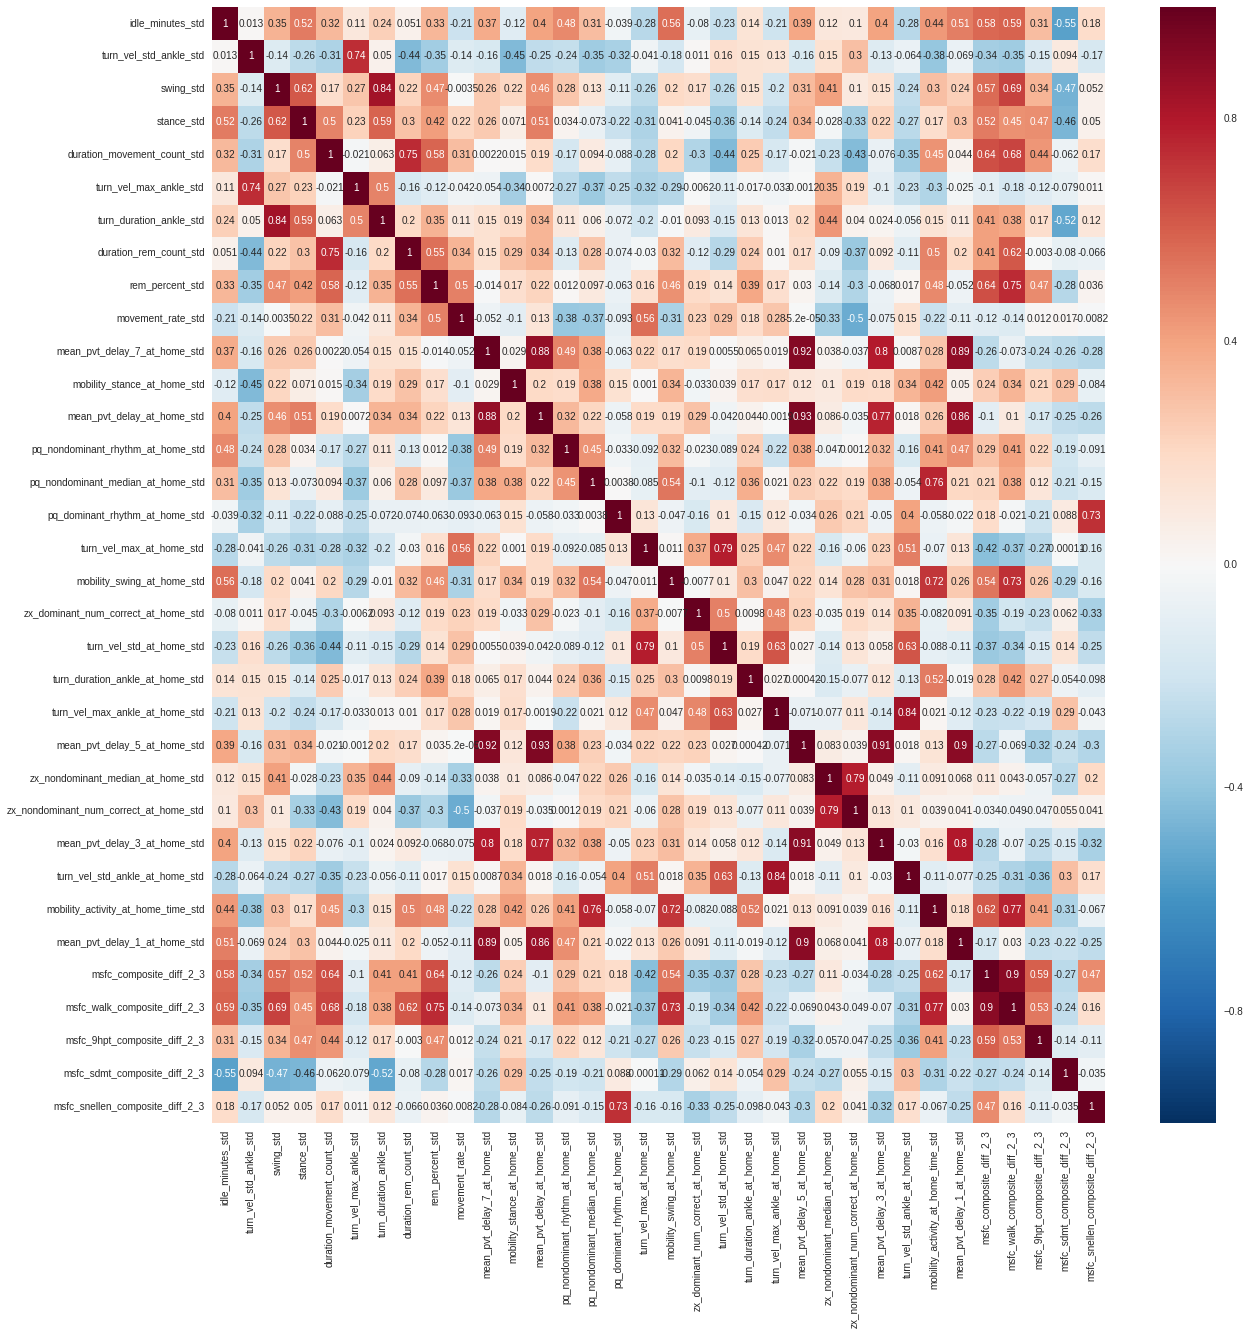

In [24]:
# correlation between standard deviation of sensor features and absolute change in MSFC scores in visits 2 & 3
plt.figure(figsize=(20, 20))
sns.heatmap(summary_of_std_df.corr(), annot=True)

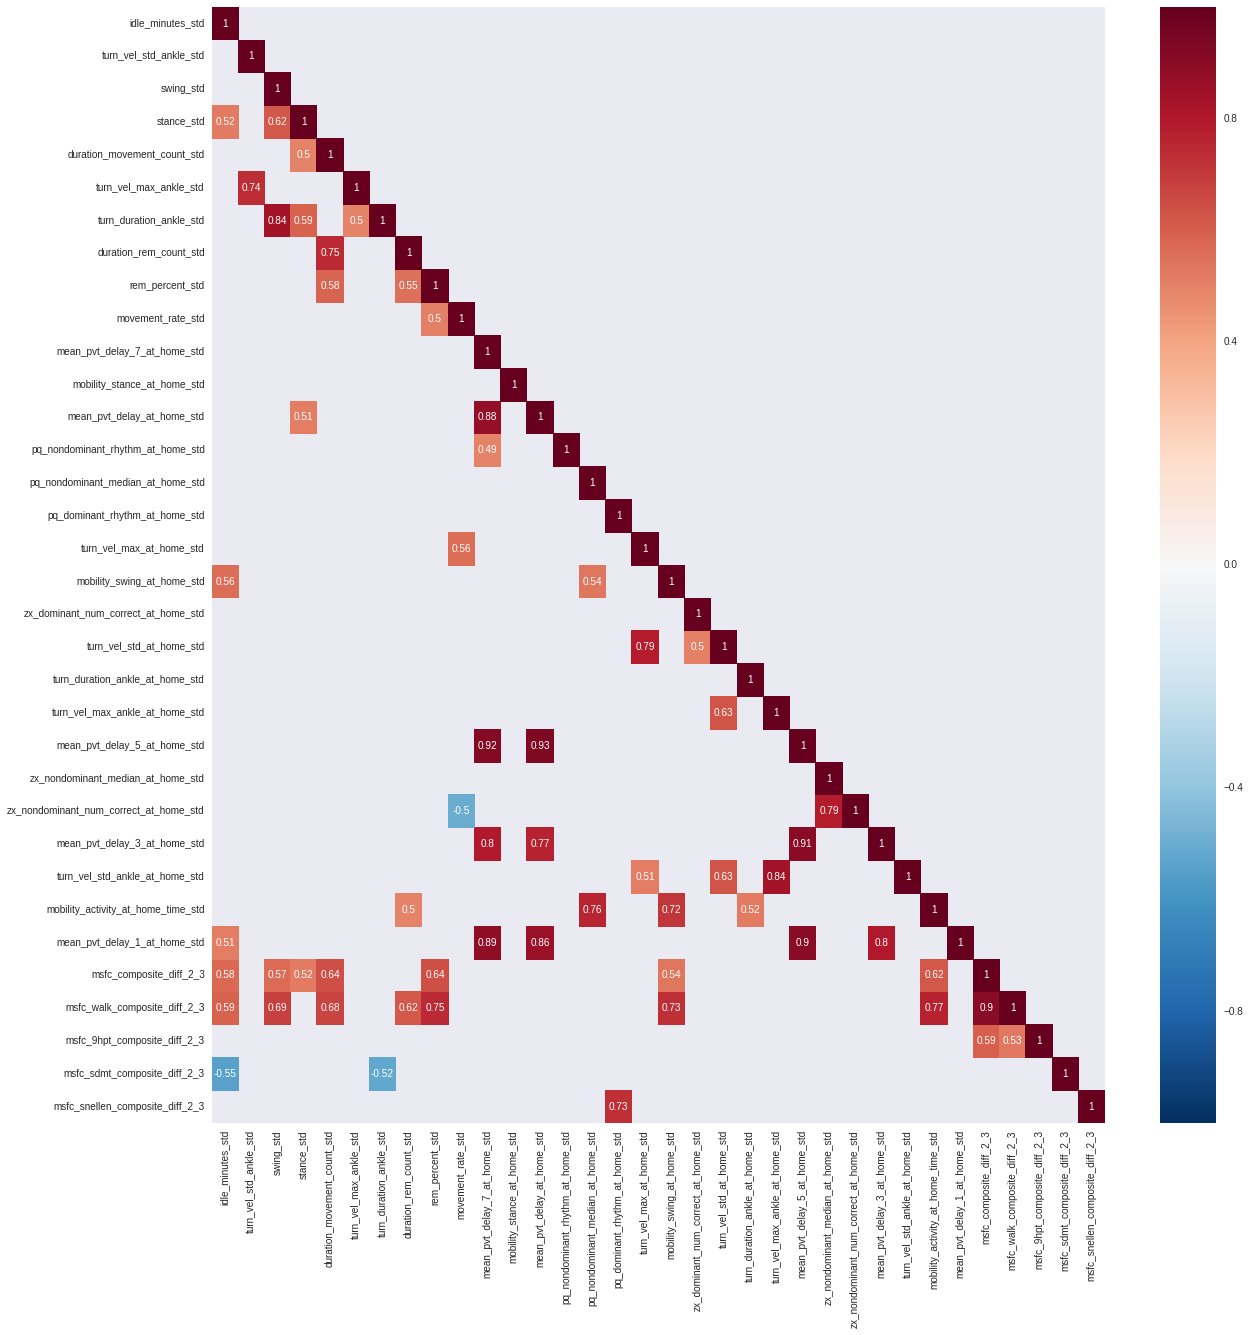

In [25]:
# make the low corelated values to mask from the heatmap
def func(x):
    if (x > -0.49) & (x < 0.49):
        return True
    else:
        return False
    
df = summary_of_std_df.corr()

# make a mask dataframe
mask = df.isnull()
for name in list(df.columns):
    mask[name] = df[name].apply(func)
# mask top half of the map as it is symmetrical
(row,col) = mask.shape
for i in range(row):
    for j in range(col):
        if j > i:
            mask.iloc[i][j] = True
# plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df, mask=mask, annot=True)

In [ ]:
# find out for each patient, which feature has the min/max variation

In [26]:
# create a new data frame with all standard deviation of sensor features
summary_of_std_df_features = pd.DataFrame(patient_IDs,columns=['patient_IDs'])

# free-living features
for feature in free_living_features_highly_correlated:
    std = measurements_std(feature)
    summary_of_std_df_features[feature + '_std'] = std

# at home features (structured activity)
for feature in at_home_features_highly_correlated:
    std = measurements_std(feature)
    summary_of_std_df_features[feature + '_std'] = std

idle_minutes


/opt/python3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/python3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


turn_vel_std_ankle
swing
stance
duration_movement_count
turn_vel_max_ankle
turn_duration_ankle
duration_rem_count
rem_percent
movement_rate
mean_pvt_delay_7_at_home
mobility_stance_at_home
mean_pvt_delay_at_home
pq_nondominant_rhythm_at_home
pq_nondominant_median_at_home
pq_dominant_rhythm_at_home
turn_vel_max_at_home
mobility_swing_at_home
zx_dominant_num_correct_at_home
turn_vel_std_at_home
turn_duration_ankle_at_home
turn_vel_max_ankle_at_home
mean_pvt_delay_5_at_home
zx_nondominant_median_at_home
zx_nondominant_num_correct_at_home
mean_pvt_delay_3_at_home
turn_vel_std_ankle_at_home
mobility_activity_at_home_time
mean_pvt_delay_1_at_home


In [27]:
summary_of_std_df_features.shape

(25, 30)

In [28]:
summary_of_std_df_features.head()

,patient_IDs,idle_minutes_std,turn_vel_std_ankle_std,swing_std,stance_std,duration_movement_count_std,turn_vel_max_ankle_std,turn_duration_ankle_std,duration_rem_count_std,rem_percent_std,...,turn_vel_std_at_home_std,turn_duration_ankle_at_home_std,turn_vel_max_ankle_at_home_std,mean_pvt_delay_5_at_home_std,zx_nondominant_median_at_home_std,zx_nondominant_num_correct_at_home_std,mean_pvt_delay_3_at_home_std,turn_vel_std_ankle_at_home_std,mobility_activity_at_home_time_std,mean_pvt_delay_1_at_home_std
0,H800001,0.122440,0.043820,0.058061,0.068251,0.097849,0.045481,0.032371,0.144423,0.067356,...,0.068378,0.084393,0.114268,0.029786,0.033730,0.029490,0.027052,0.095358,0.128466,0.038196
1,H800002,0.120002,0.069876,0.032017,0.125439,0.186660,0.105686,0.025181,0.101037,0.088674,...,0.000000,0.000000,0.000000,0.002613,0.000000,0.000000,0.003488,0.000000,0.000000,0.005181
2,H800003,0.041675,0.057114,0.067036,0.055099,0.070161,0.057578,0.024999,0.105677,0.067765,...,0.110914,0.031478,0.080067,0.004498,0.012010,0.044488,0.004662,0.110691,0.036464,0.005754
3,H800004,0.042249,0.055411,0.041776,0.060168,0.068027,0.058424,0.034864,0.136558,0.073263,...,0.080381,0.041421,0.056808,0.007593,0.038128,0.034817,0.007799,0.086345,0.030966,0.007243
4,H800006,0.048642,0.098736,0.039704,0.040074,0.077576,0.106499,0.022105,0.087621,0.056099,...,0.117488,0.087029,0.137863,0.007709,0.046963,0.084369,0.012634,0.112437,0.045640,0.010259


In [29]:
# replace std == 0 with NaN
# ignore those features with just one measurment
summary_of_std_df_features[summary_of_std_df_features == 0] = np.nan

In [30]:
summary_of_std_df_features.head()

,patient_IDs,idle_minutes_std,turn_vel_std_ankle_std,swing_std,stance_std,duration_movement_count_std,turn_vel_max_ankle_std,turn_duration_ankle_std,duration_rem_count_std,rem_percent_std,...,turn_vel_std_at_home_std,turn_duration_ankle_at_home_std,turn_vel_max_ankle_at_home_std,mean_pvt_delay_5_at_home_std,zx_nondominant_median_at_home_std,zx_nondominant_num_correct_at_home_std,mean_pvt_delay_3_at_home_std,turn_vel_std_ankle_at_home_std,mobility_activity_at_home_time_std,mean_pvt_delay_1_at_home_std
0,H800001,0.122440,0.043820,0.058061,0.068251,0.097849,0.045481,0.032371,0.144423,0.067356,...,0.068378,0.084393,0.114268,0.029786,0.033730,0.029490,0.027052,0.095358,0.128466,0.038196
1,H800002,0.120002,0.069876,0.032017,0.125439,0.186660,0.105686,0.025181,0.101037,0.088674,...,NaN,NaN,NaN,0.002613,NaN,NaN,0.003488,NaN,NaN,0.005181
2,H800003,0.041675,0.057114,0.067036,0.055099,0.070161,0.057578,0.024999,0.105677,0.067765,...,0.110914,0.031478,0.080067,0.004498,0.012010,0.044488,0.004662,0.110691,0.036464,0.005754
3,H800004,0.042249,0.055411,0.041776,0.060168,0.068027,0.058424,0.034864,0.136558,0.073263,...,0.080381,0.041421,0.056808,0.007593,0.038128,0.034817,0.007799,0.086345,0.030966,0.007243
4,H800006,0.048642,0.098736,0.039704,0.040074,0.077576,0.106499,0.022105,0.087621,0.056099,...,0.117488,0.087029,0.137863,0.007709,0.046963,0.084369,0.012634,0.112437,0.045640,0.010259


In [31]:
# extract name of columns in the new dataframe
summary_of_std_df_features.columns

Index(['patient_IDs', 'idle_minutes_std', 'turn_vel_std_ankle_std',
       'swing_std', 'stance_std', 'duration_movement_count_std',
       'turn_vel_max_ankle_std', 'turn_duration_ankle_std',
       'duration_rem_count_std', 'rem_percent_std', 'movement_rate_std',
       'mean_pvt_delay_7_at_home_std', 'mobility_stance_at_home_std',
       'mean_pvt_delay_at_home_std', 'pq_nondominant_rhythm_at_home_std',
       'pq_nondominant_median_at_home_std', 'pq_dominant_rhythm_at_home_std',
       'turn_vel_max_at_home_std', 'mobility_swing_at_home_std',
       'zx_dominant_num_correct_at_home_std', 'turn_vel_std_at_home_std',
       'turn_duration_ankle_at_home_std', 'turn_vel_max_ankle_at_home_std',
       'mean_pvt_delay_5_at_home_std', 'zx_nondominant_median_at_home_std',
       'zx_nondominant_num_correct_at_home_std',
       'mean_pvt_delay_3_at_home_std', 'turn_vel_std_ankle_at_home_std',
       'mobility_activity_at_home_time_std', 'mean_pvt_delay_1_at_home_std'],
      dtype='object')

In [32]:
# extact numerical part of the data frame to apply min and max to all rows
temp_df = summary_of_std_df_features[['idle_minutes_std', 'turn_vel_std_ankle_std',
       'swing_std', 'stance_std', 'duration_movement_count_std',
       'turn_vel_max_ankle_std', 'turn_duration_ankle_std',
       'duration_rem_count_std', 'rem_percent_std', 'movement_rate_std',
       'mean_pvt_delay_7_at_home_std', 'mobility_stance_at_home_std',
       'mean_pvt_delay_at_home_std', 'pq_nondominant_rhythm_at_home_std',
       'pq_nondominant_median_at_home_std', 'pq_dominant_rhythm_at_home_std',
       'turn_vel_max_at_home_std', 'mobility_swing_at_home_std',
       'zx_dominant_num_correct_at_home_std', 'turn_vel_std_at_home_std',
       'turn_duration_ankle_at_home_std', 'turn_vel_max_ankle_at_home_std',
       'mean_pvt_delay_5_at_home_std', 'zx_nondominant_median_at_home_std',
       'zx_nondominant_num_correct_at_home_std',
       'mean_pvt_delay_3_at_home_std', 'turn_vel_std_ankle_at_home_std',
       'mobility_activity_at_home_time_std', 'mean_pvt_delay_1_at_home_std']]

In [33]:
# make a new dataframe to store the features with max/min standard deviation for each patient
features_with_max_min_std = pd.DataFrame()
features_with_max_min_std['patient_IDs'] = summary_of_std_df_features['patient_IDs']
features_with_max_min_std['feature with minimum std'] = temp_df.idxmin(axis=1)
features_with_max_min_std['minimum std'] = temp_df.min(axis = 1)
features_with_max_min_std['feature with maximum std'] = temp_df.idxmax(axis=1)
features_with_max_min_std['maximum std'] = temp_df.max(axis=1)

In [34]:
features_with_max_min_std

,patient_IDs,feature with minimum std,minimum std,feature with maximum std,maximum std
0,H800001,pq_dominant_rhythm_at_home_std,0.010280,pq_nondominant_rhythm_at_home_std,0.285570
1,H800002,mean_pvt_delay_at_home_std,0.002306,duration_movement_count_std,0.186660
2,H800003,pq_dominant_rhythm_at_home_std,0.001549,zx_dominant_num_correct_at_home_std,0.111140
3,H800004,mean_pvt_delay_at_home_std,0.004790,turn_vel_max_at_home_std,0.146966
4,H800006,pq_dominant_rhythm_at_home_std,0.004335,turn_vel_max_ankle_at_home_std,0.137863
5,H800007,pq_dominant_rhythm_at_home_std,0.006432,turn_vel_max_ankle_at_home_std,0.300445
6,H800008,pq_dominant_rhythm_at_home_std,0.003127,duration_rem_count_std,0.161066
7,H800009,pq_dominant_rhythm_at_home_std,0.000248,pq_nondominant_rhythm_at_home_std,0.348367
8,H800010,pq_dominant_rhythm_at_home_std,0.002183,zx_nondominant_median_at_home_std,0.172158
9,H800011,mean_pvt_delay_at_home_std,0.007205,pq_nondominant_rhythm_at_home_std,0.169415


In [35]:
# list of most stable features throughout all patients
a = features_with_max_min_std['feature with minimum std'].unique()
a

array(['pq_dominant_rhythm_at_home_std', 'mean_pvt_delay_at_home_std',
       'mean_pvt_delay_7_at_home_std', nan], dtype=object)

In [36]:
# list of most varient features throughout all patients
b = features_with_max_min_std['feature with maximum std'].unique()
b

array(['pq_nondominant_rhythm_at_home_std', 'duration_movement_count_std',
       'zx_dominant_num_correct_at_home_std', 'turn_vel_max_at_home_std',
       'turn_vel_max_ankle_at_home_std', 'duration_rem_count_std',
       'zx_nondominant_median_at_home_std',
       'turn_vel_std_ankle_at_home_std', 'turn_duration_ankle_at_home_std',
       'rem_percent_std', 'idle_minutes_std', nan], dtype=object)

In [37]:
# find features that intersect between two lists (stable in one patient and noisy in the other one)
def intersect(a, b):
     return list(set(a) & set(b))

intersect(a, b)

[nan]

In [38]:
# what features have the closest/widest range of values
all_highly_correlated_features = free_living_features_highly_correlated + at_home_features_highly_correlated
df_temp_std = pd.DataFrame()
df_temp_std['feature'] = all_highly_correlated_features

result = []
# loop features
for feature in all_highly_correlated_features:
    # normalize the feature values and drop nulls
    df = FeatureDay_norm[feature]
    df.dropna(inplace=True)
    arr = pd.Series.tolist(df)
    # remove outliers
    filtered_values = []
    mean = np.mean(arr)
    std = np.std(arr)
    for value in arr:
        if (value >= mean - 2 * std) & (value <= mean + 2 * std):
            filtered_values.append(value)
    # calculate the standard deviation
    result.append(np.std(filtered_values))
# store and sort the features based on their standard deviations    
df_temp_std['std'] =  result   
df_temp_std.sort('std')

/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,feature,std
15,pq_dominant_rhythm_at_home,0.008014
10,mean_pvt_delay_7_at_home,0.017092
12,mean_pvt_delay_at_home,0.017619
22,mean_pvt_delay_5_at_home,0.018352
25,mean_pvt_delay_3_at_home,0.020109
28,mean_pvt_delay_1_at_home,0.021181
6,turn_duration_ankle,0.057247
20,turn_duration_ankle_at_home,0.078742
27,mobility_activity_at_home_time,0.080742
9,movement_rate,0.082427


In [41]:
def corr_and_p_values(df):
    # calculating p values along with correlation values for a dataframe
    # input: a dataframe
    # output: the correlation and p values between each pair of clolumns in input dataframe
    import numpy as np
    import pandas as pd
    from scipy.stats import pearsonr

    coeffmat = np.zeros((df.shape[1], df.shape[1]))
    pvalmat = np.zeros((df.shape[1], df.shape[1]))

    for i in range(df.shape[1]):    
        for j in range(df.shape[1]): 
            column1 = df.columns[i]
            column2 = df.columns[j]
            # drop all null values
            # pearsonr cannot handle null values in data(will return null for the whole)
            df_clean = df[[column1, column2]].dropna()
            df_clean.columns = [column1 + '_1', column2 + '_2']
            corrtest = pearsonr(df_clean[column1 + '_1'], df_clean[column2 + '_2'])

            coeffmat[i,j] = corrtest[0]
            pvalmat[i,j] = corrtest[1]
    # make a new dataframe with correlation and p values included
    dfcoeff = pd.DataFrame(coeffmat, columns=df.columns, index=df.columns)
    dfpvals = pd.DataFrame(pvalmat, columns=df.columns, index=df.columns)
    # return the new dataframe
    return dfcoeff, dfpvals

In [42]:
def extract_high_corr_low_p_value(dfcoeff,dfpvals,corr_th,p_th):
    # look at the p values of highly correlated features
    # input: correlation values and p values data frames, threshold for correlation and p values
    # output: highly correlated features with low p values
    feature_1 = []
    feature_2 = []
    corr_values = []
    p_values = []
    for col in list(dfcoeff.columns):
        for row in list(dfcoeff.index):
            # look for high correlation wth low p values
            if (np.abs(dfcoeff[col][row]) >= corr_th) & (dfpvals[col][row] <= p_th):
                # ignore the diagonal features and correlations not related to msfc scores
                if (row != col) & (('msfc' in row) | ('msfc' in col)):
                    corr_val = dfcoeff[col][row]
                    p_val = dfpvals[col][row]
                    feature_1.append(col)
                    feature_2.append(row)
                    corr_values.append(corr_val)
                    p_values.append(p_val)
    res = pd.DataFrame()
    res['feature_1'] = feature_1
    res['feature_2'] = feature_2
    res['corr_values'] = corr_values
    res['p_values'] = p_values
    return res

In [43]:
# look at features with high correlations and low p values
# define thresholds for pvalue and correlation value
corr_th = 0.5
p_th = 0.05

df = summary_of_std_df.drop('patient_IDs',axis=1)
dfcoeff, dfpvals = corr_and_p_values(df)
res = extract_high_corr_low_p_value(dfcoeff,dfpvals,corr_th,p_th)

dfcoeff.head()
dfpvals.head()
res

,feature_1,feature_2,corr_values,p_values
0,idle_minutes_std,msfc_composite_diff_2_3,0.576523,7.793765e-03
1,idle_minutes_std,msfc_walk_composite_diff_2_3,0.586096,6.613174e-03
2,idle_minutes_std,msfc_sdmt_composite_diff_2_3,-0.545857,1.278515e-02
3,swing_std,msfc_composite_diff_2_3,0.568867,8.857287e-03
4,swing_std,msfc_walk_composite_diff_2_3,0.686725,8.248951e-04
5,stance_std,msfc_composite_diff_2_3,0.515808,1.991468e-02
6,duration_movement_count_std,msfc_composite_diff_2_3,0.641790,3.054381e-03
7,duration_movement_count_std,msfc_walk_composite_diff_2_3,0.675616,1.499573e-03
8,turn_duration_ankle_std,msfc_sdmt_composite_diff_2_3,-0.521942,1.824886e-02
9,duration_rem_count_std,msfc_walk_composite_diff_2_3,0.623424,4.345778e-03
